<a href="https://colab.research.google.com/github/punamnagrale456/Hotel-Booking-Analysis-/blob/main/Hotel_Booking_Analysis_Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**
# **Explore and analyze the data to discover important factors that govern the bookings. **

In [52]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Mounting a drive
from google.colab import drive                     
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading csv File
file_path = '/content/drive/MyDrive/Hotel Bookings.csv'
df=pd.read_csv(file_path)


In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [53]:
# Taking a look to data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.shape

(119390, 32)

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

**1- What are the total bookings and cancellations in each hotel type?**


In [10]:
df[['children']].tail()

,children
119385,0.0
119386,0.0
119387,0.0
119388,0.0
119389,0.0


In [11]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [12]:
df['is_canceled'].unique()

array([0, 1])

In [13]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [21]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [22]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [14]:
df[['meal']]

,meal
0,BB
1,BB
2,BB
3,BB
4,BB
...,...
119385,BB
119386,BB
119387,BB
119388,BB


In [23]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(87396, 32)

In [25]:
df['arrival_date_year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: arrival_date_year, dtype: int64

In [26]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [27]:
df[['company']].shape

(87396, 1)

In [29]:
df[['arrival_date_month']]

,arrival_date_month
0,July
1,July
2,July
3,July
4,July
...,...
119385,August
119386,August
119387,August
119388,August


In [28]:
df[['company','agent']].head()

,company,agent
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,304.0
4,NaN,240.0


In [30]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [31]:
df[['company','agent']]

,company,agent
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,304.0
4,NaN,240.0
...,...,...
119385,NaN,394.0
119386,NaN,9.0
119387,NaN,9.0
119388,NaN,89.0


In [32]:
df[['company','agent']] = df[['company','agent']].fillna(0)

In [33]:
df[['company','agent']]

,company,agent
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,304.0
4,0.0,240.0
...,...,...
119385,0.0,394.0
119386,0.0,9.0
119387,0.0,9.0
119388,0.0,89.0


In [34]:
df['children'].fillna(df['children'].mean(),inplace = True)

In [35]:
df['country'].fillna('others', inplace = True)

In [36]:
df[['country']]

,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


In [ ]:
df.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [37]:
df[['country']]

,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


In [38]:
df[['arrival_date_month']]

,arrival_date_month
0,July
1,July
2,July
3,July
4,July
...,...
119385,August
119386,August
119387,August
119388,August


# **Q1-Top 10 countries from where these hotels are recieving guests**




In [39]:
df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 87396, dtype: object

In [40]:
df.country.nunique()

178

In [43]:
top_countries_with_codes = df.country.value_counts().head(10)
top_countries_with_codes

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

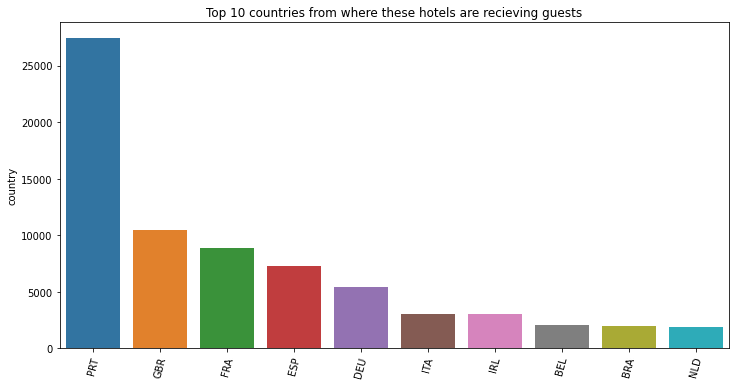

In [44]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are recieving guests')
sns.barplot(x=top_countries_with_codes.index, y=top_countries_with_codes);


## **Q2-How does the price per night vary over the year?**

In [ ]:
room_prices_monthly = df[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")
room_prices_monthly

,hotel,arrival_date_month,adr
35365,Resort Hotel,April,95.00
109628,City Hotel,April,120.00
109627,City Hotel,April,168.30
109626,City Hotel,April,119.25
109625,City Hotel,April,85.47
...,...,...,...
97011,City Hotel,September,126.90
97010,City Hotel,September,130.50
97009,City Hotel,September,149.00
97017,City Hotel,September,135.90


In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

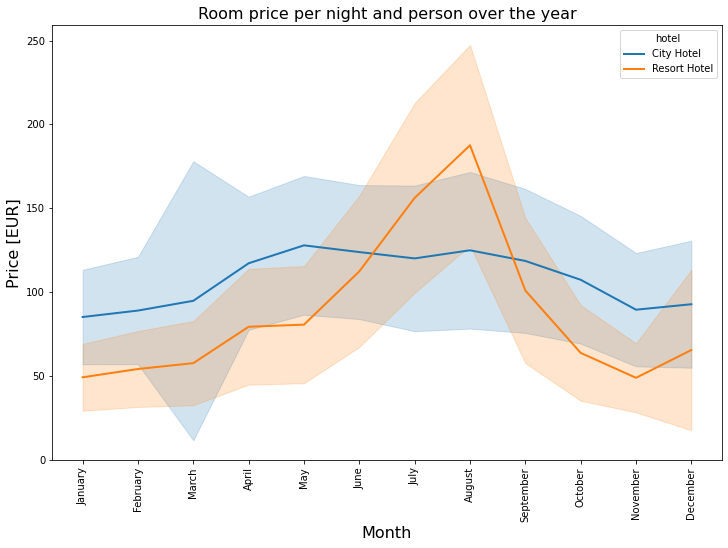

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2, 2))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()


# **Q3- Let’s check in which hotel people like to stay and spend more time.**





In [45]:
df[['market_segment']]

,market_segment
0,Direct
1,Direct
2,Direct
3,Corporate
4,Online TA
...,...
119385,Offline TA/TO
119386,Online TA
119387,Online TA
119388,Online TA


In [46]:
df[['stays_in_week_nights']]

,stays_in_week_nights
0,0
1,0
2,1
3,1
4,2
...,...
119385,5
119386,5
119387,5
119388,5


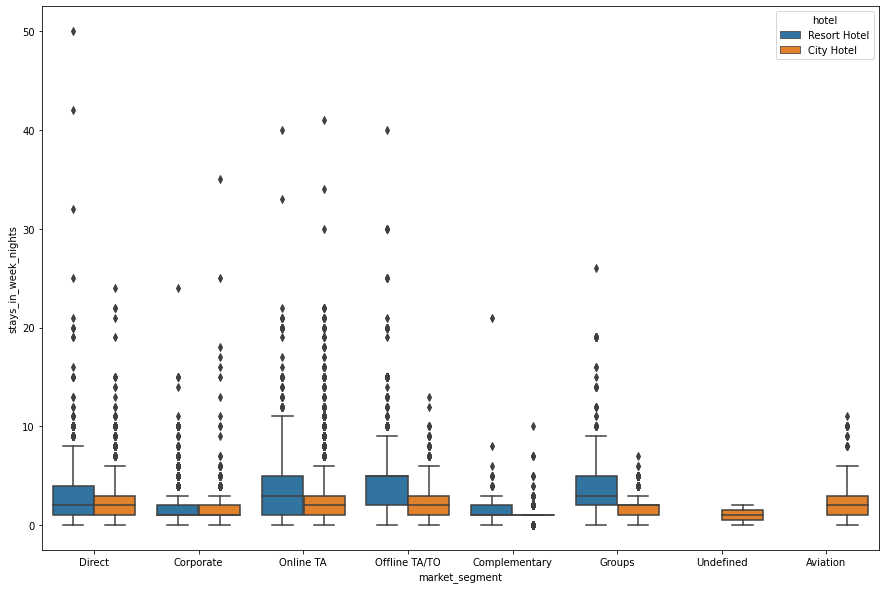

In [51]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = df, hue = "hotel");


# **Q4-Which hotel seems to make more revenue?**





In [17]:
grp_by_country = df.groupby('country')


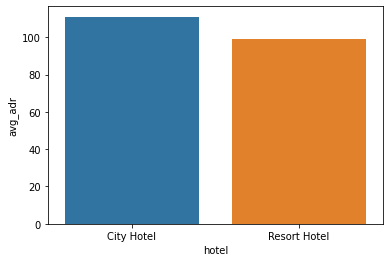

In [18]:
grp_by_Hotel = df.groupby('hotel')
d3 = grp_by_Hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})
sns.barplot(x = d3['hotel'], y = d3['avg_adr'])
plt.show()

# **Q5-Which hotel has longer waiting time?**

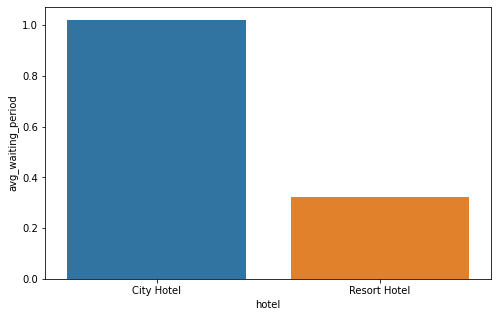

In [19]:
d5 = pd.DataFrame(grp_by_Hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()